# Pandas画图

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 全局取消证书验证
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## pandas.DataFrame.plot

DataFrame.plot(kind="line")
kind：str，需要绘制图行的种类
- 'line'：折线图
- 'bar'：条形图
- 'barh'：横向条形图
- 'hist'：直方图
- 'pie'：饼图
- 'scatter'：散点图

## pandas.Series.plot

# pandas文件存储和读取

## CSV
### read_csv

In [2]:
# 读取文件
data = pd.read_csv('./data/stock_day.csv', usecols=['open', 'close'])
data

,open,close
2018-02-27,23.53,24.16
2018-02-26,22.80,23.53
2018-02-23,22.88,22.82
2018-02-22,22.25,22.28
2018-02-14,21.49,21.92
...,...,...
2015-03-06,13.17,14.28
2015-03-05,12.88,13.16
2015-03-04,12.80,12.90
2015-03-03,12.52,12.70


### to_csv

In [3]:
# data[:10].to_csv('./data/test.csv', columns=['open'])
data[:10].to_csv('./data/test.csv', columns=['open'], index=False)

In [4]:
pd.read_csv('./data/test.csv')

,open
0,23.53
1,22.80
2,22.88
3,22.25
4,21.49
5,21.40
6,20.70
7,21.20
8,21.79
9,22.69


## HDF5

In [6]:
day_close = pd.read_hdf('./data/day_close.h5')
day_close.head()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,001965.SZ,603283.SH,002920.SZ,002921.SZ,300684.SZ,002922.SZ,300735.SZ,603329.SH,603655.SH,603080.SH
0,16.30,17.71,4.58,2.88,14.60,2.62,4.96,4.66,5.37,6.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.02,19.20,4.65,3.02,15.97,2.65,4.95,4.70,5.37,6.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.02,17.28,4.56,3.06,14.37,2.63,4.82,4.47,5.37,5.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.18,16.97,4.49,2.95,13.10,2.73,4.89,4.33,5.37,5.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.95,17.19,4.55,2.99,13.18,2.77,4.97,4.42,5.37,5.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
day_close.to_hdf('./data/test.h5', key='day_close')

In [16]:
new_data = pd.read_hdf('./data/test.h5', key='day_close')
new_data.head()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,001965.SZ,603283.SH,002920.SZ,002921.SZ,300684.SZ,002922.SZ,300735.SZ,603329.SH,603655.SH,603080.SH
0,16.30,17.71,4.58,2.88,14.60,2.62,4.96,4.66,5.37,6.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.02,19.20,4.65,3.02,15.97,2.65,4.95,4.70,5.37,6.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.02,17.28,4.56,3.06,14.37,2.63,4.82,4.47,5.37,5.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.18,16.97,4.49,2.95,13.10,2.73,4.89,4.33,5.37,5.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.95,17.19,4.55,2.99,13.18,2.77,4.97,4.42,5.37,5.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## JSON

In [8]:
json_read = pd.read_json('./data/Sarcasm_Headlines_Dataset.json', orient='records', lines=True)
json_read.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [9]:
# json_read.to_json('./data/test.json', orient='records')
json_read.to_json('./data/test.json', orient='records', lines=True)

# 高级处理-缺失值处理

## NaN处理

In [10]:
# 读取
movie = pd.read_csv('./data/IMDB-Movie-Data.csv')
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [27]:
# 里面如果有一个缺失值那么会返回False，说明有缺失值
np.all(pd.notnull(movie))

False

In [29]:
# 里面如果有一个缺失值那么会返回True，说明有缺失值
np.any(pd.isnull(movie))

True

In [31]:
# 方法一：直接删除缺失值
data = movie.dropna()

## 存在缺失值nan,并且是np.nan

In [32]:
# 判断是否
np.all(pd.notnull(data))

True

In [34]:
# 列平均值
movie['Revenue (Millions)'].mean()

82.95637614678897

In [35]:
movie['Revenue (Millions)'].fillna(movie['Revenue (Millions)'].mean(), inplace=True)

In [36]:
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [39]:
for i in movie.columns:
    if np.any(pd.isnull(movie[i])) == True:
        print(i)
        movie[i].fillna(movie[i].mean(), inplace=True)

Metascore


In [40]:
np.any(pd.isnull(movie))

False

## 不是缺失值，有特殊标记的

In [23]:
m = pd.read_csv('./data/IMDB-Movie-Data.csv')
np.all(pd.notnull(m))

False

In [29]:
m['Revenue (Millions)'].fillna(m['Revenue (Millions)'].mean())

0      333.130000
1      126.460000
2      138.120000
3      270.320000
4      325.020000
          ...    
995     82.956376
996     17.540000
997     58.010000
998     82.956376
999     19.640000
Name: Revenue (Millions), Length: 1000, dtype: float64

In [44]:
for c in m.columns:
    if np.all(pd.notnull(m[c])) == False:
        print(c)
        m[c].fillna(m[c].mean(), inplace=True)

Revenue (Millions)
Metascore


In [2]:
wis = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")
wis

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [58]:
# 将特殊符号替换为缺失值Nan
wis = wis.replace(to_replace='?', value=np.nan)
np.all(pd.notnull(wis))

False

In [4]:
# 将特殊符号替换为缺失值Nan
wis = wis.replace(to_replace='?', value=np.nan)
# 遍历每一列的索引
for w in wis.columns:
    # 如果有空
    if np.all(pd.notnull(wis[w])) == False:
        print(w)
        wis[w].fillna(vlaue=wis[w].mean(), inplace=True)

1.3


TypeError: can only concatenate str (not "int") to str

# 高级处理-数据离散化

数据离散化
- 可以用来减少给定连续属性值的个数
- 在连续属性的值域上，将值域划分为若干个离散的区间，最后用不同的符号或整数值代表落在每个子区间中的属性值。

## 股票的涨跌幅离散化

In [5]:
# 先读取股票的数据
data = pd.read_csv('./data/stock_day.csv')

In [6]:
data

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76


In [8]:
# 筛选出p_change的数据
p_change = data['p_change']
p_change.head()

2018-02-27    2.68
2018-02-26    3.02
2018-02-23    2.42
2018-02-22    1.64
2018-02-14    2.05
Name: p_change, dtype: float64

In [11]:
# 将股票涨跌幅数据进行分组，与value_counts一起使用，统计每组的个数
# 大致分为几组
qcut = pd.qcut(p_change, 10)
# 计算分到每组数据个数
qcut.value_counts()

(5.27, 10.03]                    65
(0.26, 0.94]                     65
(-0.462, 0.26]                   65
(-10.030999999999999, -4.836]    65
(2.938, 5.27]                    64
(1.738, 2.938]                   64
(-1.352, -0.462]                 64
(-2.444, -1.352]                 64
(-4.836, -2.444]                 64
(0.94, 1.738]                    63
Name: p_change, dtype: int64

In [12]:
qcut

2018-02-27    (1.738, 2.938]
2018-02-26     (2.938, 5.27]
2018-02-23    (1.738, 2.938]
2018-02-22     (0.94, 1.738]
2018-02-14    (1.738, 2.938]
                   ...      
2015-03-06     (5.27, 10.03]
2015-03-05    (1.738, 2.938]
2015-03-04     (0.94, 1.738]
2015-03-03     (0.94, 1.738]
2015-03-02    (1.738, 2.938]
Name: p_change, Length: 643, dtype: category
Categories (10, interval[float64]): [(-10.030999999999999, -4.836] < (-4.836, -2.444] < (-2.444, -1.352] < (-1.352, -0.462] ... (0.94, 1.738] < (1.738, 2.938] < (2.938, 5.27] < (5.27, 10.03]]

In [14]:
# 自定义区间分组
# 自己指定分组区间
bis = [-100, -7, -5, -3, 0, 3, 5, 7, 100]
p_counts = pd.cut(p_change, bis)

In [15]:
p_counts.value_counts()

(0, 3]        215
(-3, 0]       188
(3, 5]         57
(-5, -3]       51
(7, 100]       35
(5, 7]         35
(-100, -7]     34
(-7, -5]       28
Name: p_change, dtype: int64

## 股票涨跌幅分组数据变成one-hot编码
- 什么是one-hot编码：
把每个类别生成一个布尔列，这些列中只有一列可以为这个样本值取值为1，其又被成为热编码

In [18]:
# prefix的值随便写
dum = pd.get_dummies(p_counts, prefix='rise')
dum

,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,0,0,0,0,1,0,0,0
2018-02-26,0,0,0,0,0,1,0,0
2018-02-23,0,0,0,0,1,0,0,0
2018-02-22,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
2015-03-06,0,0,0,0,0,0,0,1
2015-03-05,0,0,0,0,1,0,0,0
2015-03-04,0,0,0,0,1,0,0,0
2015-03-03,0,0,0,0,1,0,0,0


# 高级处理-数据合并

## pd.concat实现数据合并
- pd.concat([data1, data2], axis=1)
- 按照行或列进行合并,axis=0为列索引，axis=1为行索引

In [22]:
pd.concat([data, dum], axis=1)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,...,v_ma20,turnover,"rise_(-100, -7]","rise_(-7, -5]","rise_(-5, -3]","rise_(-3, 0]","rise_(0, 3]","rise_(3, 5]","rise_(5, 7]","rise_(7, 100]"
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,...,55576.11,2.39,0,0,0,0,1,0,0,0
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,...,56007.50,1.53,0,0,0,0,0,1,0,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,...,56372.85,1.32,0,0,0,0,1,0,0,0
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,...,60149.60,0.90,0,0,0,0,1,0,0,0
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,...,61716.11,0.58,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,...,115090.18,6.16,0,0,0,0,0,0,0,1
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,...,98904.79,3.19,0,0,0,0,1,0,0,0
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,...,100812.93,2.30,0,0,0,0,1,0,0,0
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,...,117681.67,4.76,0,0,0,0,1,0,0,0


## pd.merge
- pd.merge(left, right, how='inner', on=None)
- 可以指定按照两组数据的共同键值对合并或者左右各自
 - left: DataFrame
 - right: 另一个DataFrame
 - on: 指定的共同键
 - how:按照什么方式连接

In [23]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                        'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

In [24]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [25]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [26]:
# 默认是inner内连接
pd.merge(left, right, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [28]:
# 左链接
pd.merge(left, right, on=['key1', 'key2'], how='left')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [29]:
# 右链接
pd.merge(left, right, on=['key1', 'key2'], how='right')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [30]:
# 外链接
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


# 高级处理-交叉表和透视表

## 交叉表
- 探究股票的涨跌与星期几有关？

In [32]:
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [33]:
data.index

Index(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22', '2018-02-14',
       '2018-02-13', '2018-02-12', '2018-02-09', '2018-02-08', '2018-02-07',
       ...
       '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10', '2015-03-09',
       '2015-03-06', '2015-03-05', '2015-03-04', '2015-03-03', '2015-03-02'],
      dtype='object', length=643)

In [37]:
time = pd.to_datetime(data.index)

In [38]:
time.weekday

Int64Index([1, 0, 4, 3, 2, 1, 0, 4, 3, 2,
            ...
            4, 3, 2, 1, 0, 4, 3, 2, 1, 0],
           dtype='int64', length=643)

In [39]:
time.day

Int64Index([27, 26, 23, 22, 14, 13, 12,  9,  8,  7,
            ...
            13, 12, 11, 10,  9,  6,  5,  4,  3,  2],
           dtype='int64', length=643)

In [40]:
data['week'] = time.weekday

In [41]:
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2


In [44]:
data['p_n'] = np.where(data['p_change'] > 0, 1, 0)

In [45]:
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week,p_n
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0,1
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4,1
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3,1
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2,1


In [48]:
# 以下图当中表示，week代表星期几，1,0代表这一天股票的涨跌幅是好还是坏，里面的数据代表比例
# 可以理解为所有时间为星期一等等的数据当中涨跌幅好坏的比例
count = pd.crosstab(data['week'], data['p_n'])
count

p_n,0,1
week,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [54]:
# 按列求和， 转换为float
sum = count.sum(axis=1).astype(np.float32)
sum

week
0    125.0
1    131.0
2    132.0
3    128.0
4    127.0
dtype: float32

In [59]:
# 相除，count除以sum，按
ret = count.div(sum, axis=0)
ret

p_n,0,1
week,,
0,0.504000,0.496000
1,0.419847,0.580153
2,0.462121,0.537879
3,0.492188,0.507812
4,0.464567,0.535433


<function matplotlib.pyplot.show(*args, **kw)>

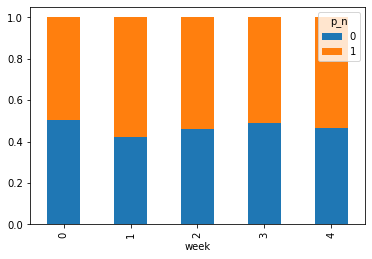

In [66]:
# 图像的绘制
ret.plot(kind='bar', stacked=True)
plt.show

## 透视表

In [67]:
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week,p_n
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0,1
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4,1
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3,1
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2,1


In [71]:
# 直接百分百
data.pivot_table(['p_n'], index='week')

,p_n
week,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


# 高级处理-分组与聚合
- 抛开分组没有聚合没有意义

In [72]:
col = pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [73]:
# 进行分组，对颜色分组，price1进行聚合
col.groupby(['color'])['price1'].mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [75]:
col['price1'].groupby(col['color']).mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [77]:
# as_index=False，默认是True
col.groupby(['color'], as_index=False)['price1'].mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

## 案例-星巴克零售店

In [79]:
# 获取数据
starbucks = pd.read_csv('./data/directory.csv')
starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [82]:
# 按照国家分组
count = starbucks.groupby(['Country']).count()
count.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Postcode,Phone Number,Timezone,Longitude,Latitude
Country,,,,,,,,,,,,
AD,1,1,1,1,1,1,1,1,1,1,1,1
AE,144,144,144,144,144,144,144,24,78,144,144,144
AR,108,108,108,108,108,108,108,100,29,108,108,108
AT,18,18,18,18,18,18,18,18,17,18,18,18
AU,22,22,22,22,22,22,22,22,0,22,22,22


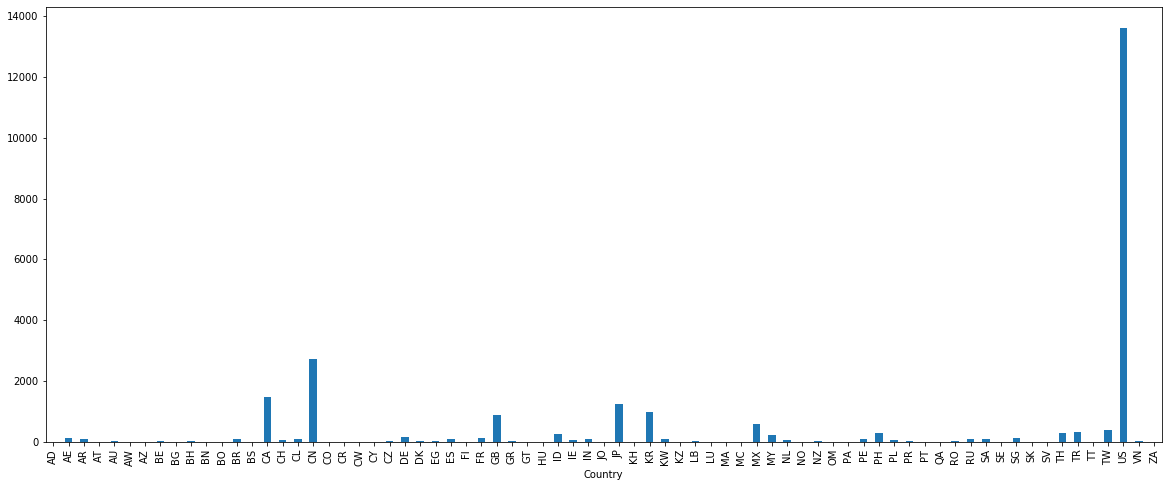

In [87]:
count['Brand'].plot(kind='bar', figsize=(20,8))
plt.show()

In [88]:
# 以Country和State/Province统计
starbucks.groupby(['Country', 'State/Province']).count()

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
...                       ...           ...         ...             ...   
US      WV                 25            25          25              25   
        WY                 23            23          23              23   
VN      HN                  6             6           6               6   
        SG                 19            19          19              19   
ZA      GT                  3             3           3               3   

                        Street Address  City  Postcode  Phone Number  \
Country State/Province                                                 
AD      7                            1     1         1             1   
AE      AJ                           2     2         0             0   
        AZ                          48    48         7            20   
        DU                          82    82        16            50   
        FU                           2     2         1             0   
...                                ...   ...       ...           ...   
US      WV                          25    25        25            23   
        WY                          23    23        23            22   
VN      HN                           6     6         6             6   
        SG                          19    19        19            17   
ZA      GT                           3     3         3             2   

                        Timezone  Longitude  Latitude  
Country State/Province                                 
AD      7                      1          1         1  
AE      AJ                     2          2         2  
        AZ                    48         48        48  
        DU                    82         82        82  
        FU                     2          2         2  
...                          ...        ...       ...  
US      WV                    25         25        25  
        WY                    23         23        23  
VN      HN                     6          6         6  
        SG                    19         19        19  
ZA      GT                     3          3         3  

[545 rows x 11 columns]

# 案例